In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from utils.helper import evaluate_classifier

In [4]:
# Create a synthetic dataset with 3 classes
X_syn, y_syn = make_classification(n_classes=3, 
                                   n_features=2, 
                                   n_redundant=0,
                                   n_clusters_per_class=1, 
                                   random_state=42)

In [5]:
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn,
                                                            test_size=0.2, random_state=0)

In [10]:
softmax_model = LogisticRegression()
softmax_model.fit(X_train_syn, y_train_syn)

LogisticRegression()

In [11]:
y_pred_syn = softmax_model.predict(X_test_syn)
evaluate_classifier(y_test_syn, y_pred_syn, model_name="Softmax Regression")

Accuracy for Softmax Regression: 0.9500


In [12]:
x_min, x_max = X_syn[:, 0].min() - 1, X_syn[:, 0].max() + 1
y_min, y_max = X_syn[:, 1].min() - 1, X_syn[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = softmax_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

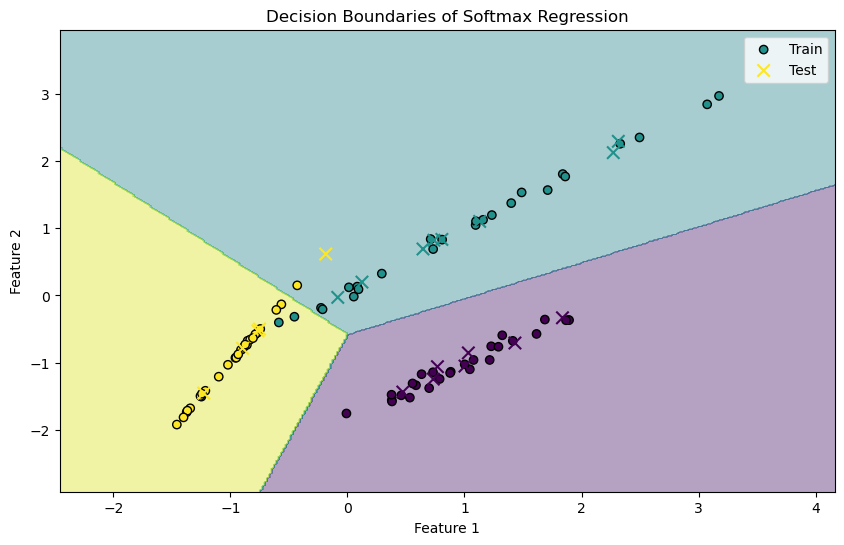

In [13]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_syn[:, 0], X_train_syn[:, 1], c=y_train_syn, edgecolors='k', label="Train")
plt.scatter(X_test_syn[:, 0], X_test_syn[:, 1], c=y_test_syn, marker='x', label="Test", s=80)
plt.title("Decision Boundaries of Softmax Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()